In [86]:
#scrapping for both external and internalthe links for the given page
import requests
from bs4 import BeautifulSoup

def wiki_links_parser(link):
    reqs = requests.get(link)
    soup = BeautifulSoup(reqs.text, 'html.parser')

    urls = []
    count = 0
    for link in soup.find(id="bodyContent").find_all('a'):
        x = link.get('href')
        if x is None:
            continue
        elif x[0] == "#":
            continue
        elif x[ : 2]== r"//":
            x = "https:"+ x
        elif r"/wiki/" in x:
            x = "https://en.wikipedia.org" + x
        count += 1
        urls.append(x)
    urls = set(urls)
    return urls

In [88]:
import pandas as pd
import numpy as np

In [89]:
df = pd.read_csv(r'D:\DOC\COLLEGE DOC\NOTES\SEMESTER 4\Data analysis\Assignments\Wiki\wiki.csv')

In [90]:
df = df.drop(['Unnamed: 4','The Classification is for the topic as well as the content of the article','Unnamed: 6'], axis = 1)

In [91]:
df.head()

,Id,Article Title,Label,Link
0,72100040.0,Quadratic Equation,1.0,https://en.wikipedia.org/wiki/Quadratic_equation
1,12041090.0,Complex Numbers,1.0,https://en.wikipedia.org/wiki/Complex_number
2,12041090.0,Bayes Theorem,2.0,https://en.wikipedia.org/wiki/Bayes%27_theorem
3,12041090.0,Straight Lines,1.0,https://en.wikipedia.org/wiki/Line_(geometry)
4,12041090.0,Functions,1.0,https://en.wikipedia.org/wiki/Function_(mathem...


In [92]:
df.shape

(876, 4)

In [93]:
df.isnull().sum()

Id                40
Article Title     42
Label             43
Link              42
dtype: int64

In [94]:
df2 = df.dropna()
df2.isnull().sum()

Id                0
Article Title     0
Label             0
Link              0
dtype: int64

In [95]:
df2.shape

(824, 4)

In [96]:
unique_links = df2['Link'].unique()
unique_links = list(unique_links)

In [97]:
len(unique_links)

533

In [98]:
count = 0
for indx,j in enumerate(unique_links):
    if "wikipedia.org/wiki/" not in unique_links[count]:
        print(True,unique_links[count],indx)
        unique_links.remove(unique_links[count])
        continue
    else:
        count += 1

True Solution of triangles - Wikipedia 97
True Mathematical induction - Wikipedia 98
True Multinomial theorem - Wikipedia 99
True Complex number - Wikipedia 100
True Linear programming - Wikipedia 101
True Bayes' theorem - Wikipedia 102
True Continuity - Wikipedia 103
True Euclidean vector - Wikipedia 104
True Venn diagram - Wikipedia 105
True https://en.wikibooks.org/wiki/Linear_Algebra/Introduction_to_Matrices_and_Determinants 111
True Linear equation - Wikipedia 314
True Rolle's theorem - Wikipedia 416
True Mathematical statistics - Wikipedia 429
True https://www.investopedia.com/terms/m/median.asp#:~:text=Key%20Takeaways-,The%20median%20is%20the%20middle%20number%20in%20a%20sorted%2C%20ascending,the%20average%20of%20the%20values. 512


In [99]:
# no of unique and correct links from the sheet
unique_links

['https://en.wikipedia.org/wiki/Quadratic_equation',
 'https://en.wikipedia.org/wiki/Complex_number',
 'https://en.wikipedia.org/wiki/Bayes%27_theorem',
 'https://en.wikipedia.org/wiki/Line_(geometry)',
 'https://en.wikipedia.org/wiki/Function_(mathematics)',
 'https://en.wikipedia.org/wiki/L%27H%C3%B4pital%27s_rule',
 'https://en.wikipedia.org/wiki/Intermediate_value_theorem',
 "https://en.wikipedia.org/wiki/Mean_value_theorem#Cauchy's_mean_value_theorem",
 'https://en.wikipedia.org/wiki/Rolle%27s_theorem',
 'https://en.wikipedia.org/wiki/Derivative',
 'https://en.wikipedia.org/wiki/Integral',
 'https://en.wikipedia.org/wiki/Integration_by_parts',
 'https://en.wikipedia.org/wiki/Triple_product#Scalar_triple_product',
 'https://en.wikipedia.org/wiki/Number_theory',
 'https://en.wikipedia.org/wiki/Diophantine_geometry',
 'https://en.wikipedia.org/wiki/Rational_number',
 'https://en.wikipedia.org/wiki/Prime_number',
 'https://en.wikipedia.org/wiki/Composite_number',
 'https://en.wikipedi

In [100]:
#function to separate inlinks and outlinks from given scrapped links
import re
def ext_int(lst):
    internal = []
    external = []
    for i in lst:
        if "https://en.wikipedia.org" in i:
            #rint("Internal--> ",i)
            internal.append(i)
        else:
            external.append(i)
            #rint("External--> ",i)
    
    lis=[]
    for i in internal:
        a = i[30:]
        if re.search(r"[^a-zA-Z0-9_-]",a)==None:        
            lis.append(i)
    new_lis=[]
    for i in lis:
        if i in unique_links:
            new_lis.append(i)
    for i in lis:
        if len(new_lis)>100:
            break
        if i not in new_lis:
            new_lis.append(i)
    return new_lis,external

In [101]:
#scrapping for nodes using a single source node:
#after exhausting all the links from one page it moves to scrape for links from another page
nodes = ['https://en.wikipedia.org/wiki/Integral']

import numpy as np
# adjacency list representation for graph
adj= [[] for i in range(3000)]
ind = 0

while len(nodes)<800:
    try:
        tem_urls = wiki_links_parser(nodes[ind])
        intr,extr = ext_int(tem_urls)
    except:
        ind = ind + 1
        continue
    for i in intr:
        if i not in nodes:
            nodes.append(i)
        adj[ind].append(nodes.index(i))
    ind = ind+1
    print(len(nodes),ind,nodes[ind-1])
    if ind > len(nodes):
        break

102 1 https://en.wikipedia.org/wiki/Integral
184 2 https://en.wikipedia.org/wiki/Logarithm
240 3 https://en.wikipedia.org/wiki/Hessian_matrix
293 4 https://en.wikipedia.org/wiki/Implicit_function
381 5 https://en.wikipedia.org/wiki/Ellipse
466 6 https://en.wikipedia.org/wiki/Cross_product
510 7 https://en.wikipedia.org/wiki/Exponential_function
527 8 https://en.wikipedia.org/wiki/Integration_by_parts
548 9 https://en.wikipedia.org/wiki/Chain_rule
614 10 https://en.wikipedia.org/wiki/Gamma_function
639 11 https://en.wikipedia.org/wiki/Leibniz_integral_rule
687 12 https://en.wikipedia.org/wiki/Vector_space
741 13 https://en.wikipedia.org/wiki/Dot_product
786 14 https://en.wikipedia.org/wiki/Linear_combination
847 15 https://en.wikipedia.org/wiki/Linear_differential_equation


In [102]:
pip install wikipedia

Note: you may need to restart the kernel to use updated packages.


In [103]:
import nltk #Importing the natural language tool kit
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nps_chat is already up-to-date!
[nltk_data]    | Downloading package omw to
[nltk_data] 

[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!
[nlt

True

In [104]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [105]:
#creating a TF_IDF feature vector using the content of the page

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def TF_IDF_feat(content):
    wordnet=WordNetLemmatizer()
    review = re.sub('[^a-zA-Z]', ' ', content) 
    corpus = []
    review = review.lower() #Lowering the sentence 
    review = review.split() #Splitting it into words
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))] #Applying stemming
    review = ' '.join(review)
    corpus.append(review)
    # Creating the TF-IDF model
    from sklearn.feature_extraction.text import TfidfVectorizer
    cv = TfidfVectorizer(max_features=100)
    Y = cv.fit_transform(corpus).toarray()
    return Y

In [106]:

# for each node creating a feature vector of TF_IDF
import wikipedia
import re

f_node=[]
titles=[]
content_fvec=[]
for j,i in enumerate(nodes):
    s= i;
    s=re.sub(r"https://en.wikipedia.org/wiki/","",s)
    temp=[]
    try:
        pg = wikipedia.page(s)
        X=TF_IDF_feat(pg.content)
        P=X[0]
        if len(P) == 100:
            titles.append(pg.title)
            f_node.append(i)
            content_fvec.append(P)
            print(i,j)
    except:
        pass

https://en.wikipedia.org/wiki/Logarithm 1
https://en.wikipedia.org/wiki/Hessian_matrix 2
https://en.wikipedia.org/wiki/Implicit_function 3
https://en.wikipedia.org/wiki/Ellipse 4
https://en.wikipedia.org/wiki/Cross_product 5
https://en.wikipedia.org/wiki/Exponential_function 6
https://en.wikipedia.org/wiki/Integration_by_parts 7
https://en.wikipedia.org/wiki/Chain_rule 8
https://en.wikipedia.org/wiki/Gamma_function 9
https://en.wikipedia.org/wiki/Leibniz_integral_rule 10
https://en.wikipedia.org/wiki/Vector_space 11
https://en.wikipedia.org/wiki/Linear_combination 13
https://en.wikipedia.org/wiki/Linear_differential_equation 14
https://en.wikipedia.org/wiki/Surface_area 16
https://en.wikipedia.org/wiki/Surface_integral 17
https://en.wikipedia.org/wiki/Real_number 18
https://en.wikipedia.org/wiki/Geometric_series 19
https://en.wikipedia.org/wiki/Calculus 20
https://en.wikipedia.org/wiki/Differential_calculus 21
https://en.wikipedia.org/wiki/Trigonometric_functions 22
https://en.wikipedi

E:\Anaconda\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file E:\Anaconda\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


https://en.wikipedia.org/wiki/Minkowski_inequality 57
https://en.wikipedia.org/wiki/Hyperboloid 58
https://en.wikipedia.org/wiki/Curve 59
https://en.wikipedia.org/wiki/Complex_analysis 60
https://en.wikipedia.org/wiki/Logarithmic_differentiation 61
https://en.wikipedia.org/wiki/Mean_value_theorem 62
https://en.wikipedia.org/wiki/Riemann_sum 63
https://en.wikipedia.org/wiki/Binomial_series 64
https://en.wikipedia.org/wiki/Integration_by_reduction_formulae 65
https://en.wikipedia.org/wiki/Stratonovich_integral 66
https://en.wikipedia.org/wiki/Symbolic_integration 67
https://en.wikipedia.org/wiki/Alhazen 68
https://en.wikipedia.org/wiki/Real-valued_function 69
https://en.wikipedia.org/wiki/Mathematica 70
https://en.wikipedia.org/wiki/Ralph_Henstock 71
https://en.wikipedia.org/wiki/Integral_symbol 72
https://en.wikipedia.org/wiki/Mathematical_singularity 73
https://en.wikipedia.org/wiki/Numerical_integration 74
https://en.wikipedia.org/wiki/Root_test 75
https://en.wikipedia.org/wiki/Macsym

https://en.wikipedia.org/wiki/Boolean_matrix 238
https://en.wikipedia.org/wiki/Block-diagonal_matrix 239
https://en.wikipedia.org/wiki/Polynomial 240
https://en.wikipedia.org/wiki/Implicit_function_theorem 241
https://en.wikipedia.org/wiki/Cubic_equation 242
https://en.wikipedia.org/wiki/Integral_test_for_convergence 243
https://en.wikipedia.org/wiki/YouTube 244
https://en.wikipedia.org/wiki/List_of_calculus_topics 245
https://en.wikipedia.org/wiki/Lebesgue_integration 246
https://en.wikipedia.org/wiki/Alpha_Chiang 247
https://en.wikipedia.org/wiki/Stochastic_calculus 248
https://en.wikipedia.org/wiki/Integration_Bee 252
https://en.wikipedia.org/wiki/Glossary_of_calculus 253
https://en.wikipedia.org/wiki/Analysis 254
https://en.wikipedia.org/wiki/Disc_integration 255
https://en.wikipedia.org/wiki/Supply_function 257
https://en.wikipedia.org/wiki/Tangent_space 258
https://en.wikipedia.org/wiki/Labor_demand 259
https://en.wikipedia.org/wiki/History_of_calculus 260
https://en.wikipedia.or

https://en.wikipedia.org/wiki/Yale_University_Press 418
https://en.wikipedia.org/wiki/Orthogonal_group 421
https://en.wikipedia.org/wiki/Josiah_Willard_Gibbs 422
https://en.wikipedia.org/wiki/Numerical_linear_algebra 423
https://en.wikipedia.org/wiki/Euclidean_vector_space 424
https://en.wikipedia.org/wiki/Hodge_star 425
https://en.wikipedia.org/wiki/Vector_Analysis 427
https://en.wikipedia.org/wiki/Mixed_tensor 428
https://en.wikipedia.org/wiki/Vector_rejection 429
https://en.wikipedia.org/wiki/Algebra_over_a_field 430
https://en.wikipedia.org/wiki/Pseudovector 431
https://en.wikipedia.org/wiki/James_Clerk_Maxwell 432
https://en.wikipedia.org/wiki/Kronecker_delta 435
https://en.wikipedia.org/wiki/Acute_angle 436
https://en.wikipedia.org/wiki/Angular_momentum 437
https://en.wikipedia.org/wiki/G-structure 438
https://en.wikipedia.org/wiki/Row_and_column_vectors 439
https://en.wikipedia.org/wiki/Bilinear_map 440
https://en.wikipedia.org/wiki/Heisenberg_algebra 441
https://en.wikipedia.or

https://en.wikipedia.org/wiki/Jonathan_Borwein 597
https://en.wikipedia.org/wiki/Particular_values_of_the_gamma_function 598
https://en.wikipedia.org/wiki/Christian_Goldbach 599
https://en.wikipedia.org/wiki/Stretched_exponential_function 600
https://en.wikipedia.org/wiki/Holomorphic_function 602
https://en.wikipedia.org/wiki/Gamma 604
https://en.wikipedia.org/wiki/Eugen_Jahnke 605
https://en.wikipedia.org/wiki/Root_of_a_function 606
https://en.wikipedia.org/wiki/Reciprocal_gamma_function 607
https://en.wikipedia.org/wiki/Mellin_transform 608
https://en.wikipedia.org/wiki/Fundamental_theorem_of_algebra 609
https://en.wikipedia.org/wiki/Bourbaki_group 611
https://en.wikipedia.org/wiki/Logarithmic_convexity 612
https://en.wikipedia.org/wiki/Gamma_correction 613
https://en.wikipedia.org/wiki/Function_of_a_real_variable 614
https://en.wikipedia.org/wiki/Bessel_function 616
https://en.wikipedia.org/wiki/One-parameter_group 617
https://en.wikipedia.org/wiki/Wilfred_Kaplan 618
https://en.wiki

https://en.wikipedia.org/wiki/Convex_combination 777
https://en.wikipedia.org/wiki/If_and_only_if 778
https://en.wikipedia.org/wiki/Block_matrix 779
https://en.wikipedia.org/wiki/Vector_subspace 780
https://en.wikipedia.org/wiki/Bimodule 781
https://en.wikipedia.org/wiki/Convex_cone 782
https://en.wikipedia.org/wiki/Exterior_algebra 783
https://en.wikipedia.org/wiki/Kronecker_product 784
https://en.wikipedia.org/wiki/Homogeneous_differential_equation 786
https://en.wikipedia.org/wiki/Separation_of_variables 787
https://en.wikipedia.org/wiki/Constant_function 788
https://en.wikipedia.org/wiki/Fractional_differential_equations 789
https://en.wikipedia.org/wiki/Finite_difference_method 790
https://en.wikipedia.org/wiki/Social_science 791
https://en.wikipedia.org/wiki/Matrix_differential_equation 792
https://en.wikipedia.org/wiki/Asymptotic_behavior 793
https://en.wikipedia.org/wiki/Dynamical_systems 794
https://en.wikipedia.org/wiki/Exact_differential_equation 796
https://en.wikipedia.org

In [107]:
#filtering only those nodes whose feature vector is being extracted and making a adjacency matrix for the filtered nodes
no_of_nodes=len(f_node)
adj_mat = np.zeros((no_of_nodes,no_of_nodes))
g_node = []
for i in range(no_of_nodes):
    ind = nodes.index(f_node[i])
    for j in adj[ind]:
        if nodes[j] in f_node:
            adj_mat[i][f_node.index(nodes[j])]=1
for i in range(no_of_nodes):
    for j in range(no_of_nodes):
        if adj_mat[i][j] == 1:
            if i not in g_node:
                g_node.append(i)
            if j not in g_node:
                g_node.append(j)
print(len(g_node),len(f_node))

683 743


In [108]:
len(content_fvec)

743

In [109]:
titles

['Logarithm',
 'Hessian matrix',
 'Implicit function',
 'Eclipse',
 'Cross product',
 'Exponential function',
 'Integration by parts',
 'Chain rule',
 'Gamma function',
 'Leibniz integral rule',
 'Vector space',
 'Linear combination',
 'Linear differential equation',
 'Surface area',
 'Surface integral',
 'Real number',
 'Geometric series',
 'Calculus',
 'Differential calculus',
 'Trigonometric functions',
 'Jacobian matrix and determinant',
 'Multiple integral',
 'Gradient',
 'Directional derivative',
 'Differential equation',
 'Lists of integrals',
 'Multivariable calculus',
 'Inverse trigonometric functions',
 'Three-dimensional space',
 'Taylor series',
 'Integration by substitution',
 'Random variable',
 'Riemann integral',
 'Vector calculus',
 'Power series',
 'Antiderivative',
 'Summation',
 'Probability density function',
 'Integral of inverse functions',
 'Improper integral',
 'Product rule',
 'Fundamental theorem of calculus',
 'Umbrella',
 'Differentiation rules',
 'Limit of

In [110]:
content_fvec[1].shape

(100,)

In [111]:
print(len(f_node),len(g_node))

743 683


In [112]:
#creating a graph object of the networkx using adj_mat
import networkx as nx
#making graph 
G = nx.Graph()
cnt=0
no=0
siz = len(f_node)
for i in range(siz):
    if i not in g_node:
        continue
    G.add_node(i)
    no=no+1
for i in range(siz):
    for j in range(siz):
        if adj_mat[i][j] == 1:
            cnt=cnt+1
            G.add_edge(i,j)
print(len(f_node),no,cnt)

743 683 1152


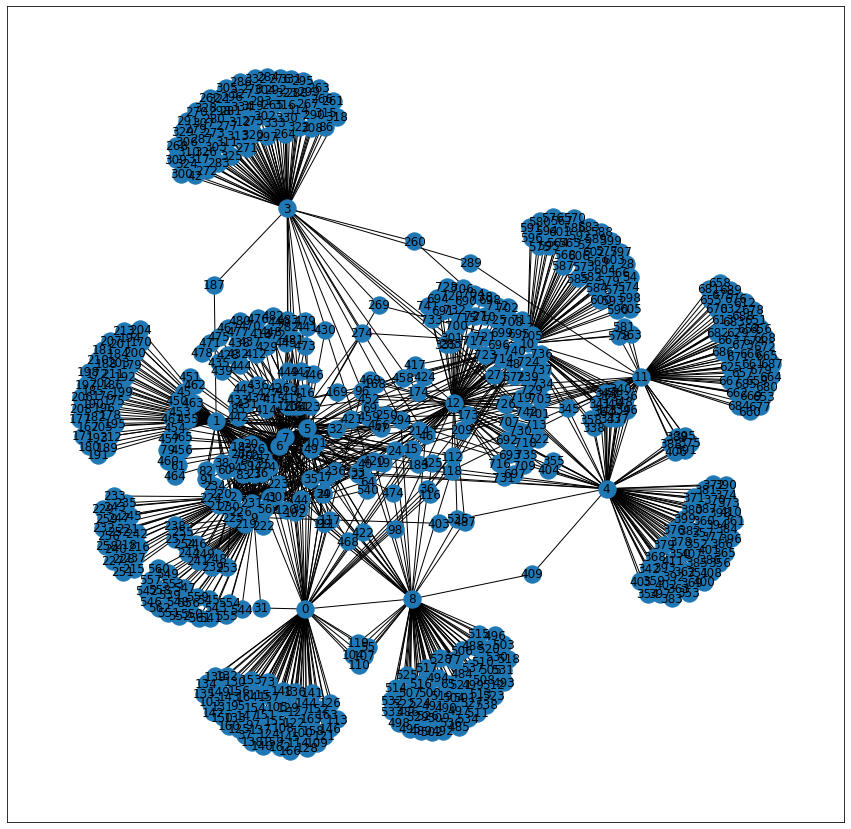

In [113]:
import matplotlib.pyplot as plt
plt.figure(figsize =(15, 15))
nx.draw_networkx(G, with_labels = True)

In [ ]:
#Calculating various types of centrality

In [114]:
deg_centrality = nx.degree_centrality(G)
deg_centrality

{0: 0.13343108504398826,
 1: 0.13196480938416422,
 2: 0.13196480938416422,
 3: 0.12756598240469208,
 4: 0.13343108504398826,
 5: 0.1348973607038123,
 6: 0.1348973607038123,
 7: 0.12903225806451613,
 8: 0.12463343108504399,
 9: 0.13929618768328444,
 10: 0.1348973607038123,
 11: 0.11730205278592376,
 12: 0.13196480938416422,
 14: 0.00879765395894428,
 15: 0.010263929618768328,
 16: 0.00879765395894428,
 17: 0.011730205278592375,
 18: 0.00879765395894428,
 19: 0.005865102639296188,
 20: 0.00879765395894428,
 21: 0.00879765395894428,
 22: 0.010263929618768328,
 23: 0.00879765395894428,
 24: 0.00879765395894428,
 25: 0.00879765395894428,
 26: 0.00879765395894428,
 27: 0.001466275659824047,
 28: 0.001466275659824047,
 29: 0.013196480938416423,
 30: 0.010263929618768328,
 31: 0.002932551319648094,
 32: 0.00879765395894428,
 33: 0.010263929618768328,
 34: 0.013196480938416423,
 35: 0.011730205278592375,
 36: 0.002932551319648094,
 37: 0.001466275659824047,
 38: 0.007331378299120235,
 39: 0.008

In [115]:
close_centrality = nx.closeness_centrality(G)
close_centrality

{0: 0.4238657551274083,
 1: 0.4025974025974026,
 2: 0.3974358974358974,
 3: 0.3793103448275862,
 4: 0.39195402298850573,
 5: 0.4460431654676259,
 6: 0.4355044699872286,
 7: 0.4016489988221437,
 8: 0.41866175567833025,
 9: 0.40378922439313203,
 10: 0.4091181763647271,
 11: 0.4061941631923764,
 12: 0.4273182957393484,
 14: 0.3381259295984135,
 15: 0.4042679312388856,
 16: 0.3381259295984135,
 17: 0.40023474178403756,
 18: 0.3381259295984135,
 19: 0.3694474539544962,
 20: 0.3381259295984135,
 21: 0.3381259295984135,
 22: 0.38574660633484165,
 23: 0.3381259295984135,
 24: 0.40378922439313203,
 25: 0.3381259295984135,
 26: 0.3381259295984135,
 27: 0.2995169082125604,
 28: 0.29045996592844975,
 29: 0.41560024375380866,
 30: 0.35010266940451745,
 31: 0.32445290199809707,
 32: 0.37994428969359334,
 33: 0.38574660633484165,
 34: 0.41560024375380866,
 35: 0.38509316770186336,
 36: 0.3352999016715831,
 37: 0.29781659388646287,
 38: 0.32476190476190475,
 39: 0.34831460674157305,
 40: 0.39929742388

In [116]:
bet_centrality = nx.betweenness_centrality(G, normalized = True,endpoints = False)
bet_centrality

{0: 0.18463284715556194,
 1: 0.129814814803349,
 2: 0.0907986020214197,
 3: 0.20044694639409658,
 4: 0.16914917614153127,
 5: 0.11540160463662606,
 6: 0.09678283507477771,
 7: 0.0733697246932837,
 8: 0.18231232802051323,
 9: 0.101158335540804,
 10: 0.16491819340601474,
 11: 0.1469896470871949,
 12: 0.18670480134694717,
 14: 5.569637618846068e-05,
 15: 0.016772036383002936,
 16: 5.569637618846068e-05,
 17: 0.008956859283224079,
 18: 5.569637618846068e-05,
 19: 0.0033762533518787554,
 20: 5.569637618846068e-05,
 21: 5.569637618846068e-05,
 22: 0.013104638160104811,
 23: 5.569637618846068e-05,
 24: 0.008109829599672127,
 25: 5.569637618846068e-05,
 26: 5.569637618846068e-05,
 27: 0.0,
 28: 0.0,
 29: 0.011729744504792932,
 30: 0.002828581597757322,
 31: 0.0008422523717591366,
 32: 0.007495098113629041,
 33: 0.013104638160104811,
 34: 0.011729744504792932,
 35: 0.006272493778180313,
 36: 0.001774104117381126,
 37: 0.0,
 38: 0.0,
 39: 0.004091586981876168,
 40: 0.018433913484438527,
 41: 0.0

In [117]:
c = nx.clustering(G)
c

{0: 0.01562881562881563,
 1: 0.046192259675405745,
 2: 0.04694132334581773,
 3: 0.0008019246190858059,
 4: 0.011233211233211233,
 5: 0.05231724796942188,
 6: 0.061156235069278544,
 7: 0.06426332288401254,
 8: 0.012044817927170869,
 9: 0.04994400895856663,
 10: 0.013616817964644052,
 11: 0.018354430379746836,
 12: 0.009238451935081148,
 14: 0.9333333333333333,
 15: 0.42857142857142855,
 16: 0.9333333333333333,
 17: 0.6071428571428571,
 18: 0.9333333333333333,
 19: 0.5,
 20: 0.9333333333333333,
 21: 0.9333333333333333,
 22: 0.6666666666666666,
 23: 0.9333333333333333,
 24: 0.4666666666666667,
 25: 0.9333333333333333,
 26: 0.9333333333333333,
 27: 0,
 28: 0,
 29: 0.6111111111111112,
 30: 0.8095238095238095,
 31: 0,
 32: 0.6666666666666666,
 33: 0.6666666666666666,
 34: 0.6111111111111112,
 35: 0.6785714285714286,
 36: 0,
 37: 0,
 38: 1.0,
 39: 0.7333333333333333,
 40: 0.5357142857142857,
 41: 0.8095238095238095,
 42: 0,
 43: 0.9333333333333333,
 44: 0.7619047619047619,
 45: 0,
 46: 0.2857

In [135]:
#creating a target using already labelled nodes and marking -1 for unlabelled
labelled_nodes = []
y=[]
cnt=0
for i in f_node:
    t=[]
    ind=0
    f=0
    for j in df['Link']:
        if i==j:
            t.append(j)
            t.append(int(df.iloc[ind]['Label']))
            labelled_nodes.append(t)
            f=1
            cnt=cnt+1
            break
        ind=ind+1
    if f==0:
        labelled_nodes.append([i,-1])
    y.append(labelled_nodes[-1][1])
print("labelled nodes:",cnt)
print("total node:",len(f_node))

labelled nodes: 178
total node: 743


In [119]:
# Skleran
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # for showing confusion matrix
from sklearn.preprocessing import MinMaxScaler # for feature scaling
from sklearn.semi_supervised import LabelPropagation # for assigning labels to unlabeled data

In [120]:
#labelling nodes using label propogation
X = np.array(content_fvec)

### Step 2 - Perform Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


### Step 3 - Configure model parameters 
model_LP_knn = LabelPropagation(kernel='knn',    # {'knn', 'rbf'} default='rbf'
                              #gamma=70,         # default=20, Parameter for rbf kernel.
                              n_neighbors=5,    # default=7, Parameter for knn kernel which is a strictly positive integer.
                              max_iter=1000,     # default=30, Maximum number of iterations allowed.
                              tol=0.001,         # default=1e-3, Convergence tolerance: threshold to consider the system at steady state.
                              n_jobs=-1,         # default=None, The number of parallel jobs to run. -1 means using all processors. 
                             )

### Step 4 - Fit the model
LP_knn = model_LP_knn.fit(X_scaled, y)

pred = LP_knn.transduction_       
pred=list(pred)

E:\Anaconda\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
E:\Anaconda\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:290: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(


In [121]:
#prediction of the given nodes in order
print(pred)

[2, 2, 1, 2, 1, 2, 2, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 0, 2, 2, 3, 3, 1, 3, 0, 2, 2, 1, 2, 3, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 3, 2, 0, 3, 2, 2, 2, 1, 3, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 3, 2, 1, 2, 1, 1, 2, 1, 0, 3, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 2, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 2, 3, 1, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [122]:
#storing result into a dataframe
resultdf = pd.DataFrame()
resultdf["Title"] = titles
resultdf["link"] = f_node
resultdf["label"] = pred
resultdf.head(10)

,Title,link,label
0,Logarithm,https://en.wikipedia.org/wiki/Logarithm,2
1,Hessian matrix,https://en.wikipedia.org/wiki/Hessian_matrix,2
2,Implicit function,https://en.wikipedia.org/wiki/Implicit_function,1
3,Eclipse,https://en.wikipedia.org/wiki/Ellipse,2
4,Cross product,https://en.wikipedia.org/wiki/Cross_product,1
5,Exponential function,https://en.wikipedia.org/wiki/Exponential_func...,2
6,Integration by parts,https://en.wikipedia.org/wiki/Integration_by_p...,2
7,Chain rule,https://en.wikipedia.org/wiki/Chain_rule,1
8,Gamma function,https://en.wikipedia.org/wiki/Gamma_function,3
9,Leibniz integral rule,https://en.wikipedia.org/wiki/Leibniz_integral...,3


In [128]:
#traversal algorithm for mentioning order,
#[order]: for any topic it will complete easy, medium and hard topics in order, but if at any topic if it points to another
#easy topic it is completed before the remaining medium topic, and so on.
def traverse(topic):
    if topic not in titles:
        print("Not available in currently trained module!")
    else:
        s = titles.index(topic)
        qe=[s]
        qm=[]
        qh=[]
        vis = [0 for i in range(len(titles))]
        while (len(qe)+len(qm)+len(qh))!=0:
            if len(qe)!=0:
                v = qe.pop(0)
            elif len(qm)!=0:
                v = qm.pop(0)
            else:
                v = qh.pop(0)
            if vis[v] == 1:
                continue
            vis[v]=1
            print(titles[v],pred[v])
            for j in range(len(adj_mat[v])):
                if adj_mat[v][j]==0 or vis[j]==1:
                    continue
                if pred[j]==1:
                    qe.append(j)
                elif pred[j]==2:
                    qe.append(j)
                elif pred[j]==3:
                    qh.append(j)


In [125]:
#prediction corresponding to title, use among this title to get order list, as any other label is not under the trained model.
for i in range(len(titles)):
    print(titles[i],pred[i])

Logarithm 2
Hessian matrix 2
Implicit function 1
Eclipse 2
Cross product 1
Exponential function 2
Integration by parts 2
Chain rule 1
Gamma function 3
Leibniz integral rule 3
Vector space 1
Linear combination 1
Linear differential equation 3
Surface area 1
Surface integral 3
Real number 1
Geometric series 1
Calculus 0
Differential calculus 2
Trigonometric functions 2
Jacobian matrix and determinant 3
Multiple integral 3
Gradient 1
Directional derivative 3
Differential equation 0
Lists of integrals 2
Multivariable calculus 2
Inverse trigonometric functions 1
Three-dimensional space 2
Taylor series 3
Integration by substitution 1
Random variable 1
Riemann integral 2
Vector calculus 2
Power series 2
Antiderivative 2
Summation 2
Probability density function 3
Integral of inverse functions 3
Improper integral 2
Product rule 1
Fundamental theorem of calculus 1
Umbrella 1
Differentiation rules 2
Limit of a function 2
Harmonic analysis 1
Mathematics 1
Continuous function 1
Ordinary differentia

In [129]:
traverse('Logarithm')

Logarithm 2
Exponential function 2
Chain rule 1
Real number 1
Trigonometric functions 2
Integration by substitution 1
Random variable 1
Power series 2
Antiderivative 2
Summation 2
Fundamental theorem of calculus 1
Mathematics 1
Complex analysis 2
Logarithmic differentiation 2
Intermediate value theorem 2
Hyperbole 1
List of logarithmic identities 1
Algorithm 2
Factorial 1
Statistics 2
Slope 1
Number theory 2
Natural number 1
Prime number theorem 1
Geometric mean 2
Prime number 1
Normal distribution 1
Logarithmic derivative 1
Complex plane 2
Log-normal distribution 2
Arithmetic progression 1
Monotonic function 1
Isomorphism 2
Natural logarithm 2
Complex number 1
Tangent 2
Binomial distribution 2
Arithmetic mean 1
Logarithm of a matrix 1
Exponentiation 1
Unit of measurement 1
Hessian matrix 2
Integration by parts 2
Geometric series 1
Differential calculus 2
Gradient 1
Lists of integrals 2
Multivariable calculus 2
Vector calculus 2
Product rule 1
Differentiation rules 2
Limit of a functio

In [134]:
traverse('Eclipse')

Eclipse 2
Umbrella 1
Mathematics 1
Hyperbole 1
Statistics 2
Geometric mean 2
Arithmetic mean 1
Determinant 1
Triangle inequality 1
Circle 1
Circumscribed circle 2
Steiner inellipse 2
Director circle 2
Parametric equation 1
Harmonic mean 2
Bijection 2
Ellipsoid method 1
Steiner ellipse 2
Steiner ellipse 2
Engineering 1
Projective plane 3
Ellipsoid 3
Isotropy 3
